<a href="https://colab.research.google.com/github/CVanchieri/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/1_AFirstLookatData_Lecture%26Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

General Notes:
- GITHUB is an open source version control system.
- There are other version control software systems (Bitbucket, GitLab, etc.)
- colab.research.google.com
- Fork creates a version of the master repository in your GitHub account.
- Open first module notebook and copy link into Colab
- Save a copy to GitHub and add commit message

## Loading Data

In [0]:
# Where to get data sets #

# UCI machine learning repository
# FiveThirtyEight
# Kaggle - bigger data sets 
# DrivenData - more social nonprofits

# main libraries to use and import.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# use !wget to download a dataset from url to local colab instance.
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
  
# load the data.
!ls

--2019-08-20 22:27:52--  https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘drinks.csv’

drinks.csv          100%[===================>]   4.28K  --.-KB/s    in 0s      

2019-08-20 22:27:53 (75.4 MB/s) - ‘drinks.csv’ saved [4384/4384]

drinks.csv  sample_data


In [0]:
# label the data frame and usep.read_csv() to upload the csv.
drinks2 = pd.read_csv('drinks.csv')

# show the shape of the data frame (rows,columns).
print(drinks2.shape)

# show the data frame.
drinks2.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
# loading from a .csv file.

# label the data set and use pd.read_csv() to load a .csv file.
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')

# show the shape of the data frame (rows,columns).
print(drinks.shape)

# show the data frame.
drinks.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


## Data Exploration

In [0]:
# show all the column names.
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [0]:
# sort all the values in 'wine_servings' from highest to lowest, show 10 rows.
drinks.sort_values('wine_servings', ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
55,Equatorial Guinea,92,0,233,5.8


In [0]:
# show the largest 10 values in the 'beer_servings' column.
drinks.nlargest(10, 'beer_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


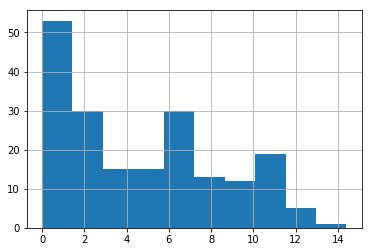

In [0]:
# create a histogram of the 'total_litres_of_pure_alcohol' column.
drinks.total_litres_of_pure_alcohol.hist()

# show the histrogram.
plt.show()

In [0]:
# create a new column that gives text to the 'total_litres_of_pure_alcohol' column, >9 = high, >=6 = medium, ==0 none, low.
drinks['drinks_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol'] > 9, 'high',
                           np.where(drinks['total_litres_of_pure_alcohol'] >= 6, 'medium',
                           np.where(drinks['total_litres_of_pure_alcohol'] == 0, 'none', 'low')))

# show the new column added.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [0]:
# show the new values for the new 'drinks_alcohol' column.
drinks.drinks_alcohol.value_counts()

low       105
medium     41
high       34
none       13
Name: drinks_alcohol, dtype: int64

## Joining Another Dataset

In [0]:
# label and import the 2nd data set.
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

# show the shape of the data set.
print(countries.shape)

# show the data set headers.
countries.head()

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
drinks.at[184, 'country'] = 'United States of America'

In [0]:
# show the columns of the data frame we want to merge.
countries[['name','region','sub-region']].head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [0]:
# we can use .join to join 2 data sets, this instance .join does not work.
df = drinks.join(countries[['name','region','sub-region']], how='left')

# show the data shape.
print(df.shape)

# show the data set headers.
df.head()

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Åland Islands,Europe,Northern Europe
2,Algeria,25,0,14,0.7,low,Albania,Europe,Southern Europe
3,Andorra,245,138,312,12.4,high,Algeria,Africa,Northern Africa
4,Angola,217,57,45,5.9,low,American Samoa,Oceania,Polynesia


In [0]:
# we should use pd.merge to merge the data sets together, selecting the columns that we want to merge.
df = pd.merge(drinks, countries[['name','region','sub-region']], how='left', left_on='country', right_on='name')

# show the shape of the data set.
print(df.shape)

# show the data set header and merged columns.
df.head()

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa


In [0]:
# show the info of the new merged data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 8 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
name                            168 non-null object
region                          168 non-null object
sub-region                      168 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 13.6+ KB


In [0]:
# show how many NA values there are and where.
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_alcohol                   0
name                            26
region                          26
sub-region                      26
dtype: int64

In [0]:
# show which countries did not join properly and have an NA.
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,high,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,none,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,none,NaN,NaN,NaN
92,Laos,62,0,123,6.2,medium,NaN,NaN,NaN


In [0]:
drinks.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
drinks_alcohol                                    medium
Name: 184, dtype: object

In [0]:
# show the value counts for the 'region' column.
df.region.value_counts()

Africa      48
Asia        40
Europe      37
Americas    27
Oceania     15
Name: region, dtype: int64

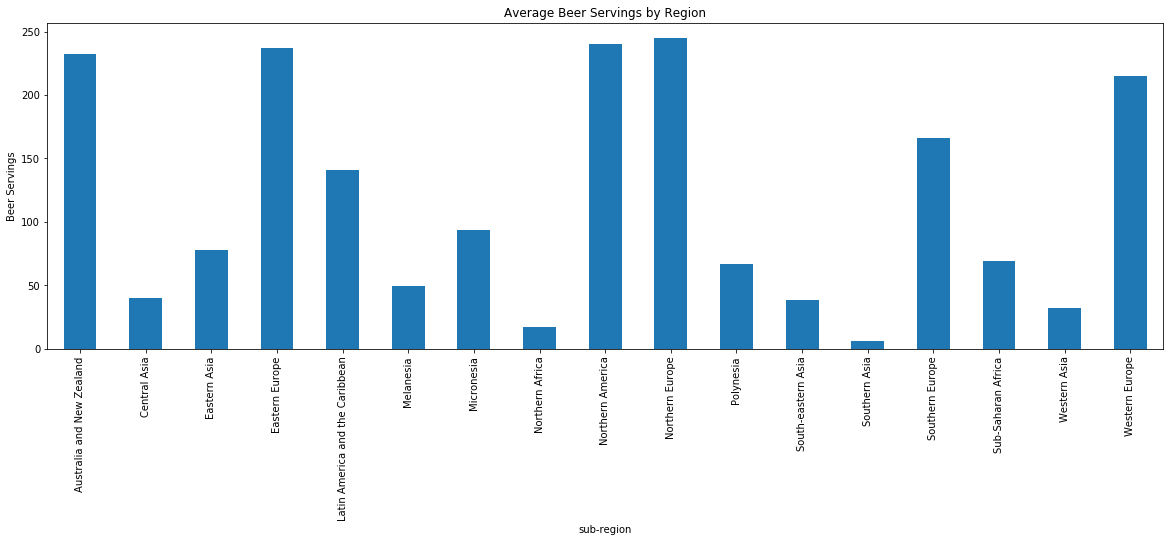

In [0]:
# use group by and create a bar plot with 'sub_region' and 'beer_servings' columns, enlarge the garph with figsize.
df.groupby('sub-region').beer_servings.mean().plot(kind='bar', figsize=(20,6))

# give the graph a title.
plt.title('Average Beer Servings by Region')

# label the y axis.
plt.ylabel('Beer Servings')

# show the bar plot.
plt.show()

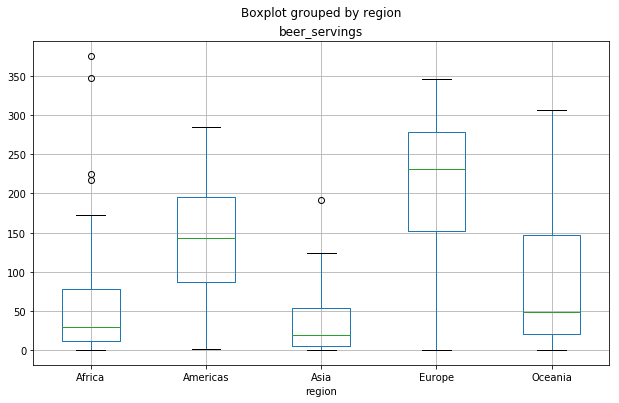

In [0]:
# create a box plot for columns 'beer_servings' and 'region'.
df.boxplot(column='beer_servings', by='region', figsize=(10,6))

# show the box plot.
plt.show()

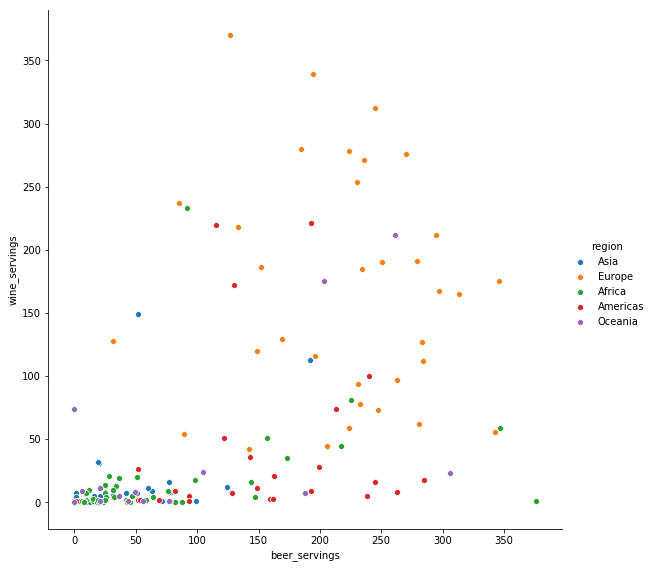

In [0]:
# create a pair plot with 'beer_servings' as x axis and 'wine_servings' as y axis, and color the data based on the 'region' column.
sns.pairplot(x_vars=["beer_servings"], y_vars=["wine_servings"], data=df, hue="region", height=8)

# show the pair plot.
plt.show()

In [0]:
# Drop rows with NAs for Bokeh Interactive plot
df = df.dropna(subset=["region"])

# show the new shape of the data set with the dropped rows.
df.shape

(167, 9)

## Awesome Bokeh Plot

In [0]:
# Bokeh plot code.

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

x = df.beer_servings.values
y = df.wine_servings.values
country = df.country
region = df.region

source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])

palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)

# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Beer and Wine Servings per Year by Country")

# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)

# add axis labels
p.xaxis.axis_label = "Beer Servings"
p.yaxis.axis_label = "Wine Servings"

output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




In [0]:
# import the libraries that will be used.
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [0]:
# using same data set from lecture.

# radin the .csv file.
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
# print the shape of the data frame.
print(drinks.shape)
# show the data frame with headers.
drinks.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
# Look at all the column names.
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [0]:
# List the rows in non ascending order by 'wine_servings'.
drinks.sort_values('wine_servings', ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
55,Equatorial Guinea,92,0,233,5.8


In [0]:
# show the statistics for the 'wine_servings' column.
drinks['wine_servings'].describe()

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: wine_servings, dtype: float64

In [0]:
# show the largest 10 values in the 'wine_servings' column.
drinks.nlargest(10, 'wine_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_wine
61,France,127,151,370,11.8,high
136,Portugal,194,67,339,11.0,high
3,Andorra,245,138,312,12.4,high
166,Switzerland,185,100,280,10.2,medium
48,Denmark,224,81,278,10.4,medium
156,Slovenia,270,51,276,10.6,medium
99,Luxembourg,236,133,271,11.4,medium
42,Croatia,230,87,254,10.2,medium
83,Italy,85,42,237,6.5,medium
55,Equatorial Guinea,92,0,233,5.8,medium


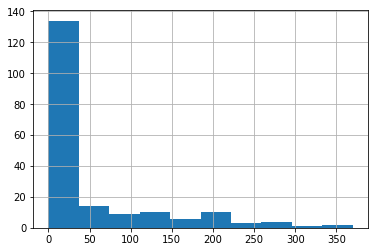

In [0]:
# create a histogram of the 'wine_servings' column.
drinks.wine_servings.hist()
# show the histrogram.
plt.show()

In [0]:
# add a column at the end to give some text to the 'wine_servings' score.
drinks['drinks_wine'] = np.where(drinks['wine_servings'] > 300, 'high',
                           np.where(drinks['wine_servings'] >= 150, 'medium',
                           np.where(drinks['wine_servings'] == 0, 'none', 'low')))
                        
# show the headers of the data set.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_wine
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [0]:
# show the new values for the new 'drinks_wine' column.
drinks.drinks_wine.value_counts()

low       137
none       31
medium     22
high        3
Name: drinks_wine, dtype: int64

## Joining Another Dataset

In [0]:
# join the countries data set from lecture.

# label and read in the .csv file.
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

In [0]:
# show the columns of the data frame we want to merge.
countries[['name','region','sub-region']].head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [0]:
# use pd.merge to merge the data sets together, selecting the columns that we want to merge.
df = pd.merge(drinks, countries[['name','region','sub-region']], how='left', left_on='country', right_on='name')
# show the shape of the data frame.
print(df.shape)
# show the data frame with headers.
df.head()

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_wine,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa


In [0]:
# show how many NA values there are and where.
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_wine                      0
name                            26
region                          26
sub-region                      26
dtype: int64

In [0]:
# show which countries did not join properly and have an NA.
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_wine,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,low,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,none,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,none,NaN,NaN,NaN
92,Laos,62,0,123,6.2,low,NaN,NaN,NaN


In [0]:
# look specifically at 'Czech Republic'.
drinks.iloc[45]

country                         Czech Republic
beer_servings                              361
spirit_servings                            170
wine_servings                              134
total_litres_of_pure_alcohol              11.8
drinks_wine                                low
Name: 45, dtype: object

In [0]:
# show the value counts for the 'region' column.
df.region.value_counts()

Africa      48
Asia        40
Europe      37
Americas    27
Oceania     15
Name: region, dtype: int64

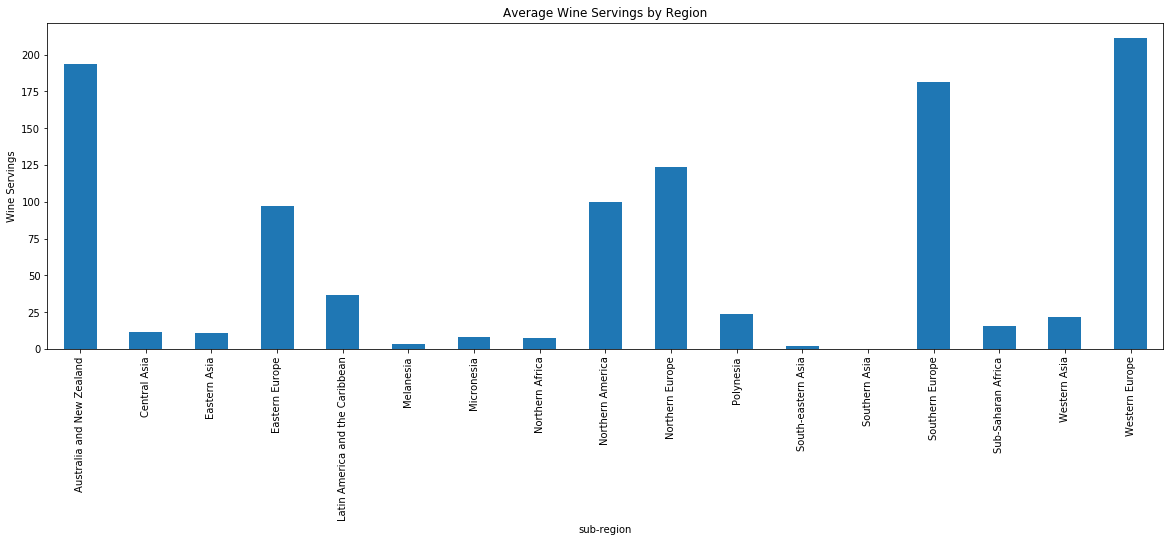

In [0]:
# use group by and create a bar plot with 'sub_region' and 'wine_servings' columns, enlarge the garph with figsize.
df.groupby('sub-region').wine_servings.mean().plot(kind='bar', figsize=(20,6))
# give the graph a title.
plt.title('Average Wine Servings by Region')
# label the y axis.
plt.ylabel('Wine Servings')
# show the bar plot.
plt.show()

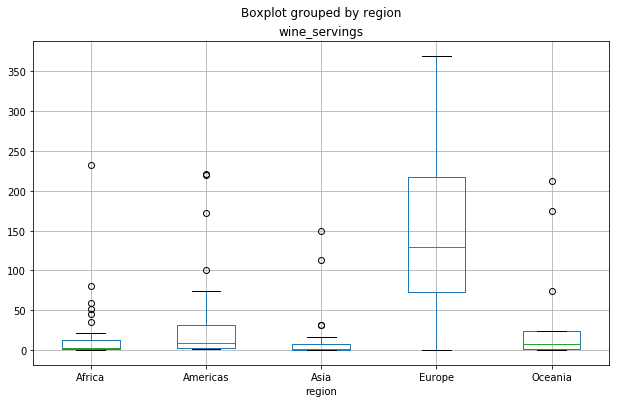

In [0]:
# create a boxplot for columns 'wine_servings' and 'region'.
df.boxplot(column='wine_servings', by='region', figsize=(10,6))

# show the box plot.
plt.show()

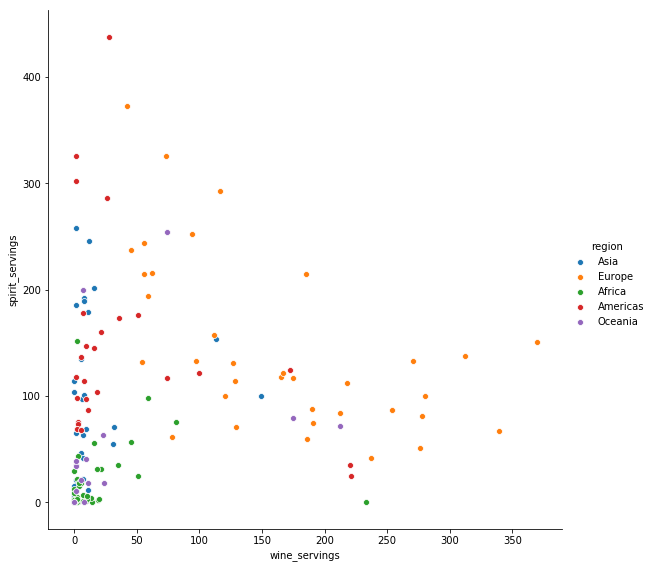

In [0]:
# create a pairplot with 'wine_servings' as x axis and 'spirit_servings' as y axis, and color the data based on the 'region' column.
sns.pairplot(x_vars=["wine_servings"], y_vars=["spirit_servings"], data=df, hue="region", height=8)
# show the pair plot.
plt.show()

## Awesome Bokeh Plot

In [0]:
# Drop rows with NAs for Bokeh Interactive plot
df = df.dropna(subset=["region"])
# show the new shape of the data set with the dropped rows.
df.shape

(167, 9)

In [0]:
# Bokeh plot code.

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

x = df.wine_servings.values
y = df.spirit_servings.values
country = df.country
region = df.region

source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])

palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)

# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Wine and Spirit Servings per Year by Country")

# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)

# add axis labels
p.xaxis.axis_label = "Wine Servings"
p.yaxis.axis_label = "Spirit Servings"

output_file('interactive_bokeh_plot.html')
show(p)

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.